In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Datos/Precipitaciones_Totales_Mensuales.csv")
estaciones_activas = data["ESTACIÓN"].value_counts()[:10]
rs = data[data["ESTACIÓN"] == "Represa Sisga"].sort_values("AÑO")
rs.drop(rs.index[0:32], axis = 0, inplace = True)
lr = data[data["ESTACIÓN"] == "La Ramada"].sort_values("AÑO")
lr.drop(lr.index[0:32], axis = 0, inplace = True)
ep = data[data["ESTACIÓN"] == "El Pino"].sort_values("AÑO").drop_duplicates(subset = ["AÑO"])
ep.drop(ep.index[0:10], axis = 0, inplace = True)
zi = data[data["ESTACIÓN"] == "Zipaquirá"].sort_values("AÑO")
zi.drop(zi.index[0:30], axis = 0, inplace = True)
gu = data[data["ESTACIÓN"] == "Guatavita"].sort_values("AÑO")
gu.drop(gu.index[0:24], axis = 0, inplace = True)
ee = data[data["ESTACIÓN"] == "El Encanto"].sort_values("AÑO").drop_duplicates(subset = ["AÑO"])
ee.drop(ee.index[0:10], axis = 0, inplace = True)
ids = data[data["ESTACIÓN"] == "Isla del Santuario"].sort_values("AÑO")
ids.drop(ids.index[0:22], axis = 0, inplace = True)
ch = data[data["ESTACIÓN"] == "Checua"].sort_values("AÑO")
ch.drop(ch.index[0:17], axis = 0, inplace = True)
ve = data[data["ESTACIÓN"] == "Venecia"].sort_values("AÑO")
ve.drop(ve.index[0:14], axis = 0, inplace = True)
es = data[data["ESTACIÓN"] == "El Salitre"].sort_values("AÑO")
es.drop(es.index[0:15], axis = 0, inplace = True)
estaciones = [ee, ids, gu, ve, lr, zi, rs, ch, ep, es]
estaciones_activas

Represa Sisga         83
La Ramada             82
El Pino               81
Zipaquirá             79
Tesoro                74
Guatavita             73
El Encanto            69
Isla del Santuario    69
Checua                66
Venecia               65
Name: ESTACIÓN, dtype: int64

In [25]:
ubicaciones = []
for i in estaciones:
    ubicaciones.append(i["MUNICIPIO"].iloc[0])
ubicaciones

['Tausa',
 'Fúquene',
 'Guatavita',
 'Facatativá',
 'Funza',
 'Zipaquirá',
 'Chocontá',
 'Nemocón',
 'Sutatausa',
 'Tausa']

In [26]:
df_promedios = pd.DataFrame()
est = []
promedios = []
prom_año = []
for i in estaciones:
    promedios.append([])
    est.append(i["ESTACIÓN"].iloc[0])
    años = i["AÑO"].to_numpy().tolist()
    for j in range(0, len(años)):
        promedios[len(promedios) - 1].append(sum(i.iloc[j].to_numpy().tolist()[7:])/12)
for i in promedios:
    prom_año.append(sum(i)/len(i))
df_promedios["ESTACIÓN"] = est
df_promedios["PROMEDIO_LLUVIAS/AÑO [mm]"] = prom_año
df_promedios["UBICACIÓN"] = ubicaciones
df_promedios

,ESTACIÓN,PROMEDIO_LLUVIAS/AÑO [mm],UBICACIÓN
0,El Encanto,64.151361,Tausa
1,Isla del Santuario,83.822518,Fúquene
2,Guatavita,58.221939,Guatavita
3,Venecia,76.005882,Facatativá
4,La Ramada,61.699667,Funza
5,Zipaquirá,66.157653,Zipaquirá
6,Represa Sisga,75.623203,Chocontá
7,Checua,52.959014,Nemocón
8,El Pino,50.398913,Sutatausa
9,El Salitre,69.871500,Tausa


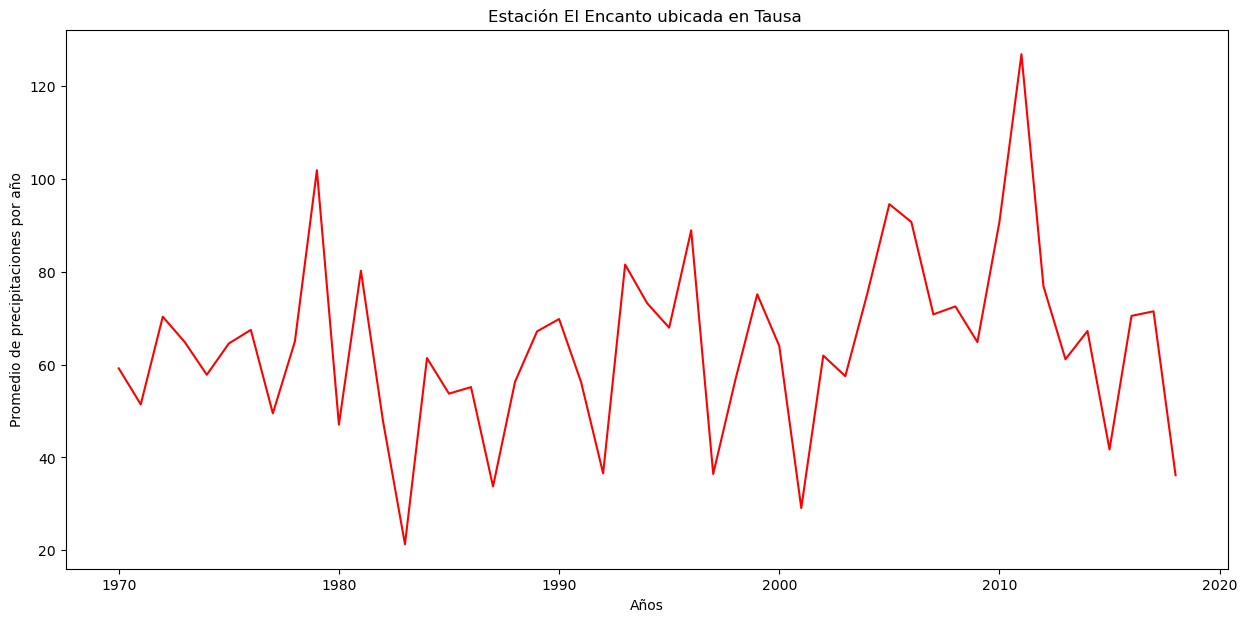

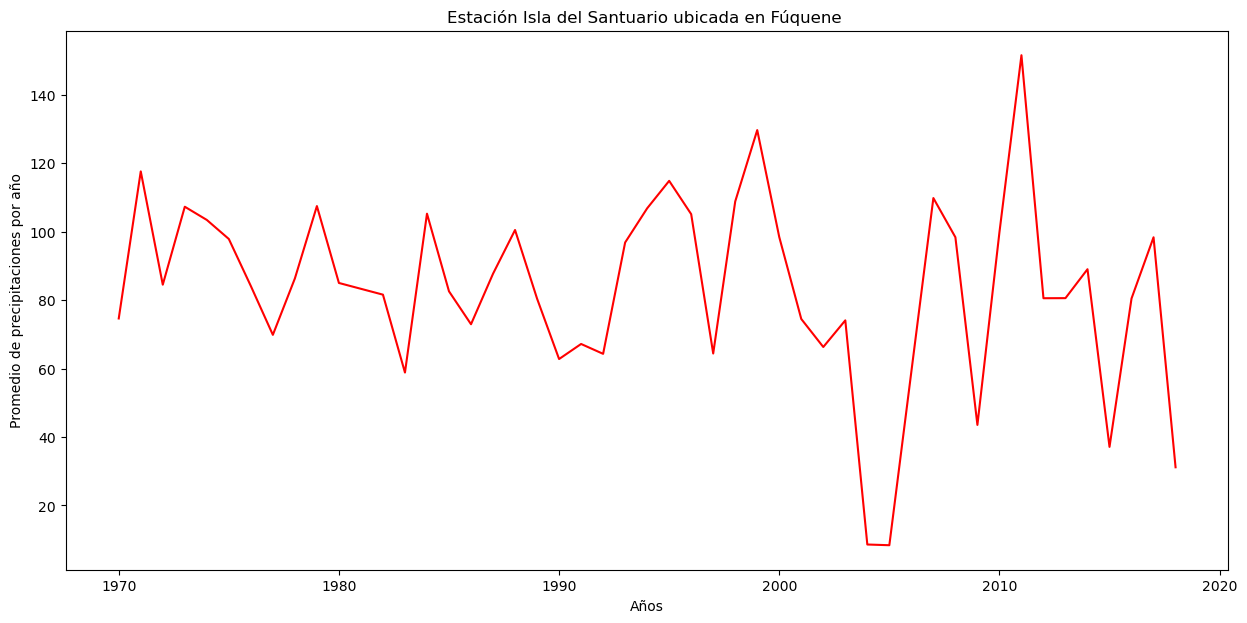

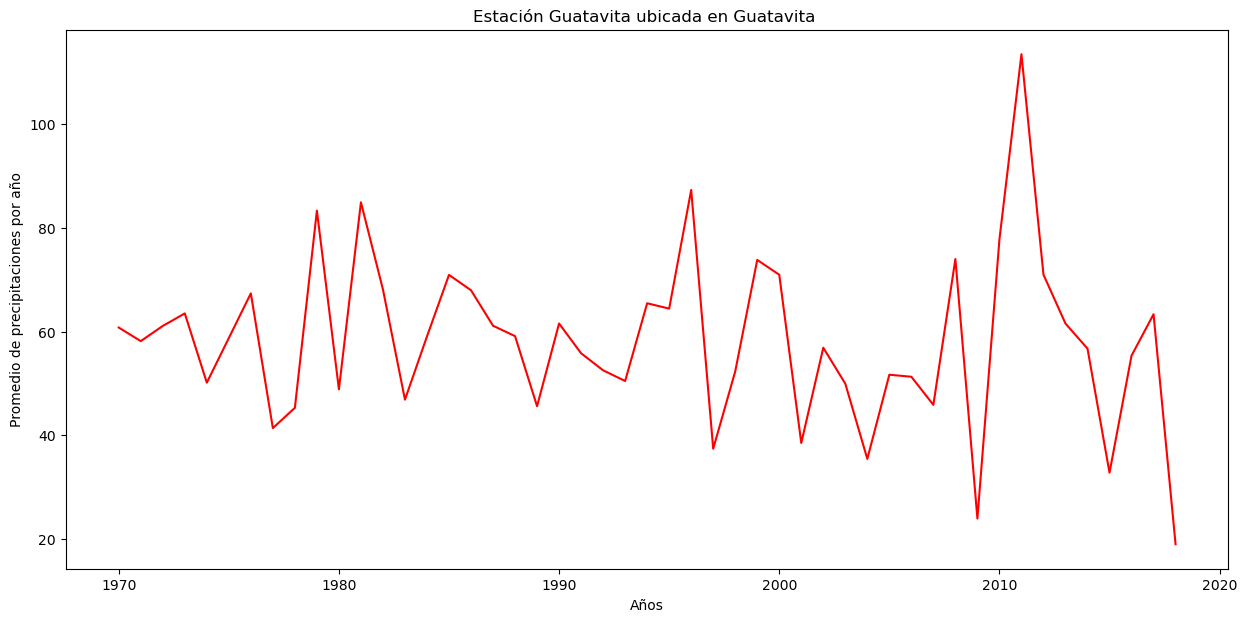

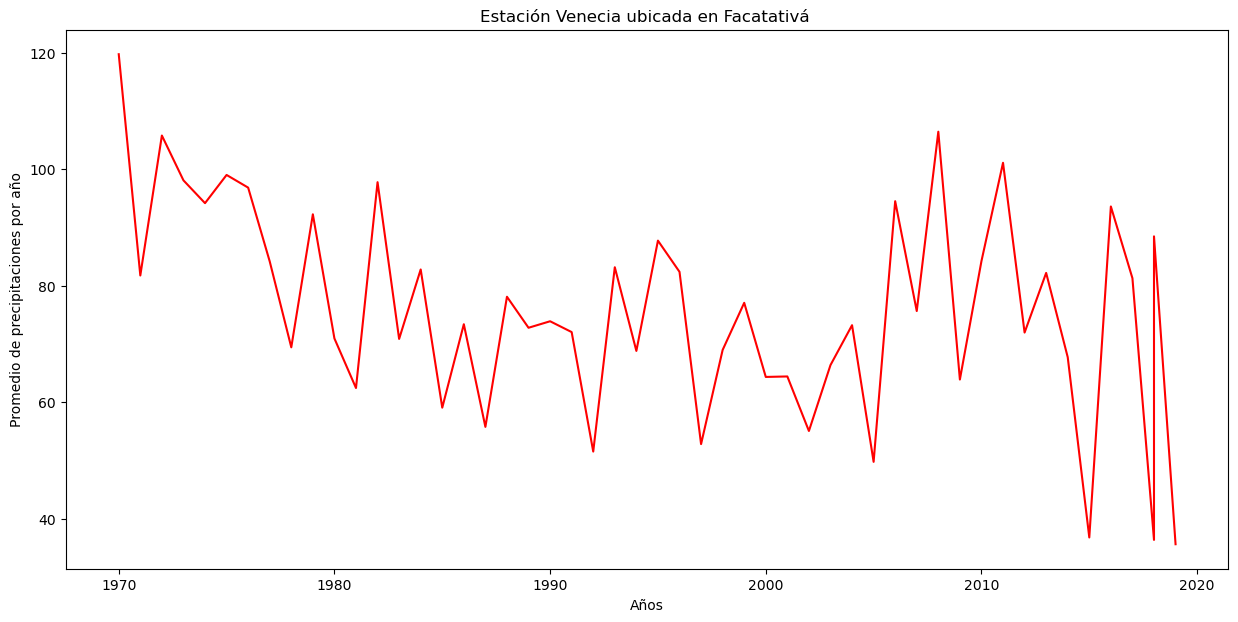

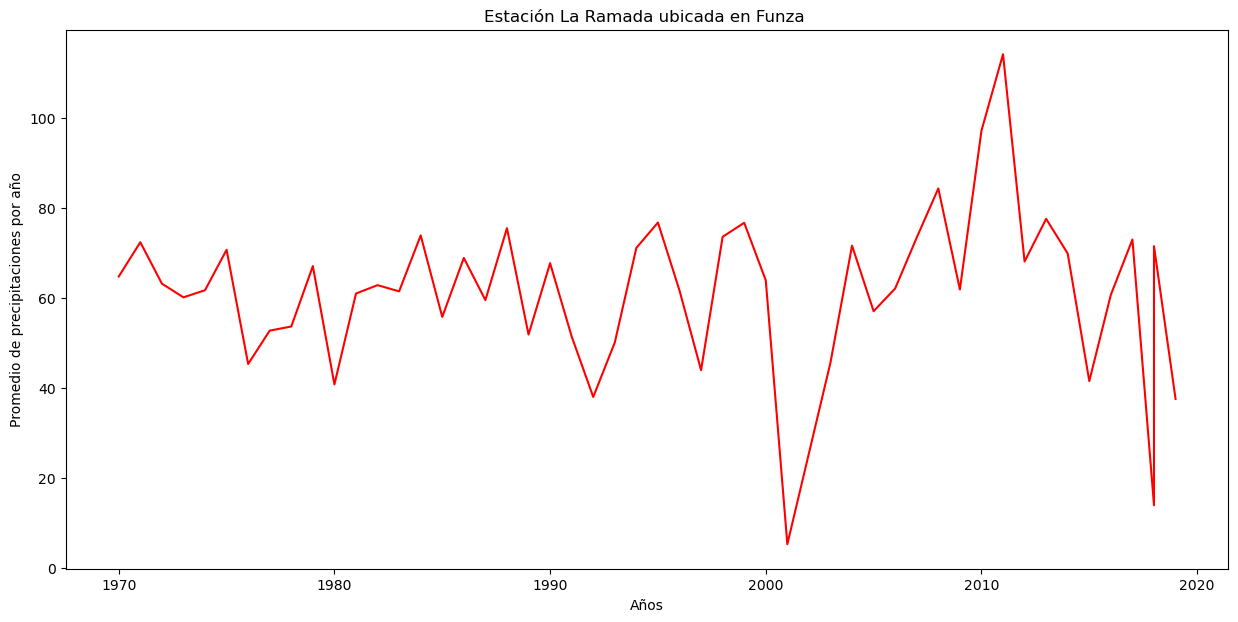

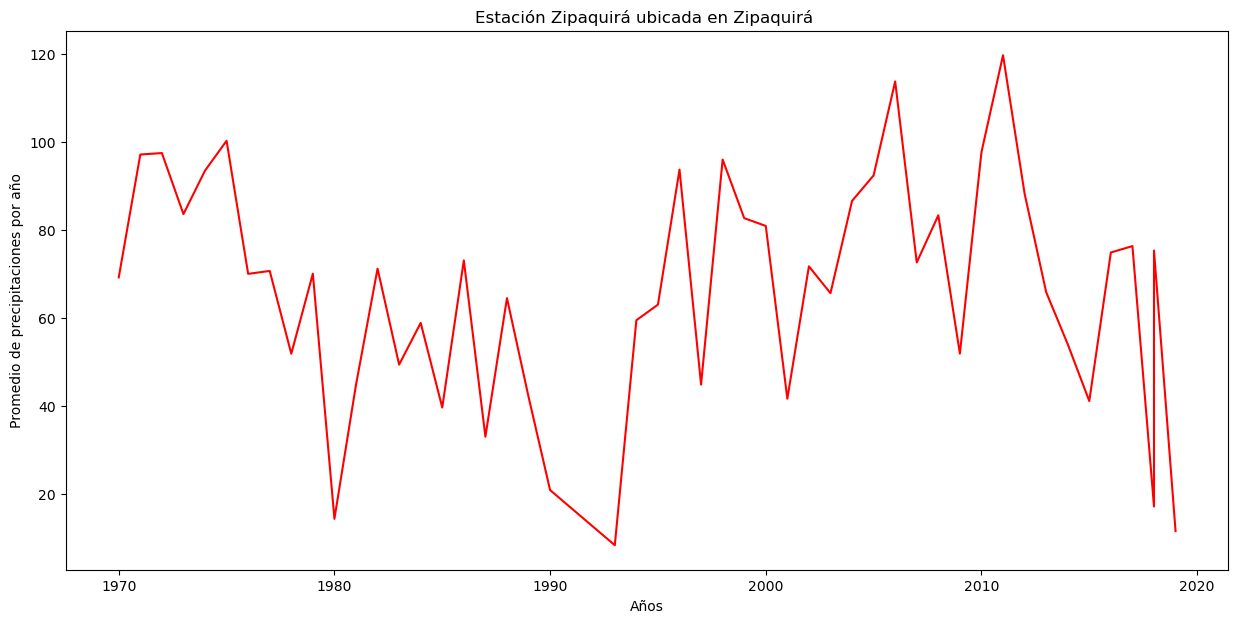

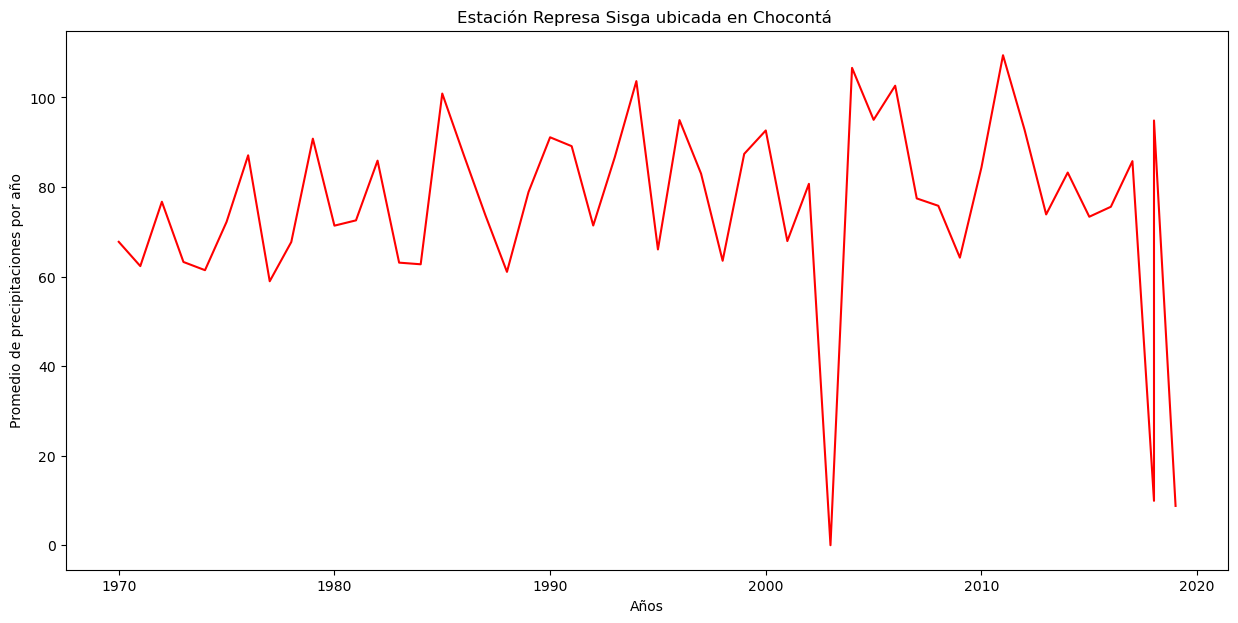

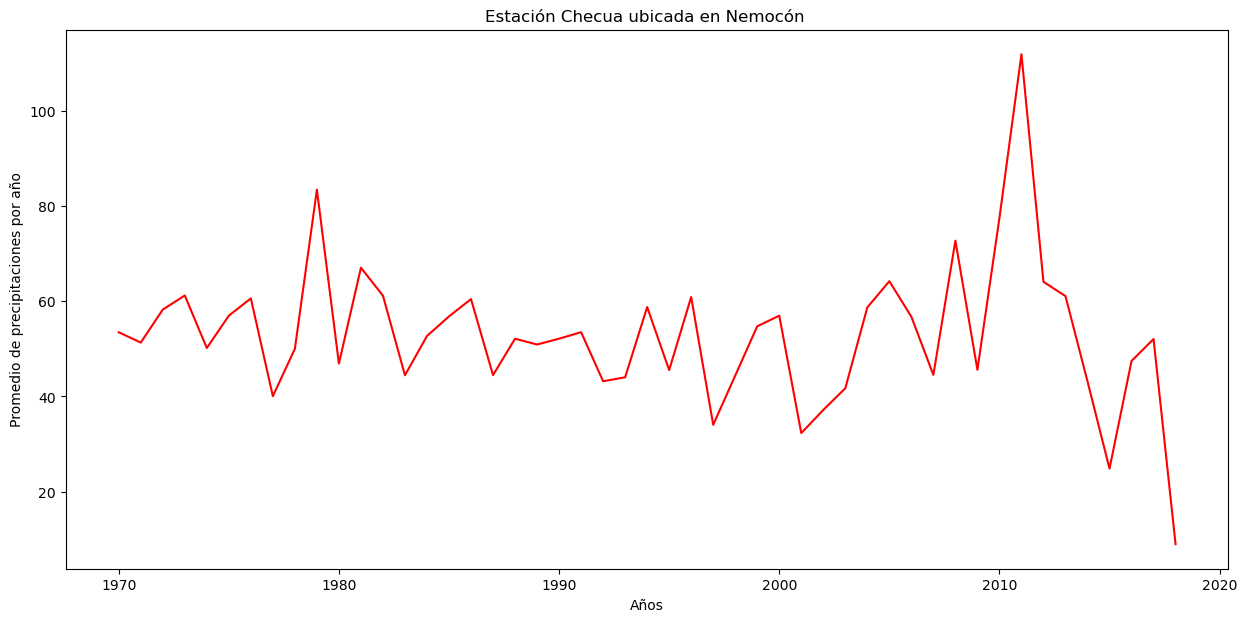

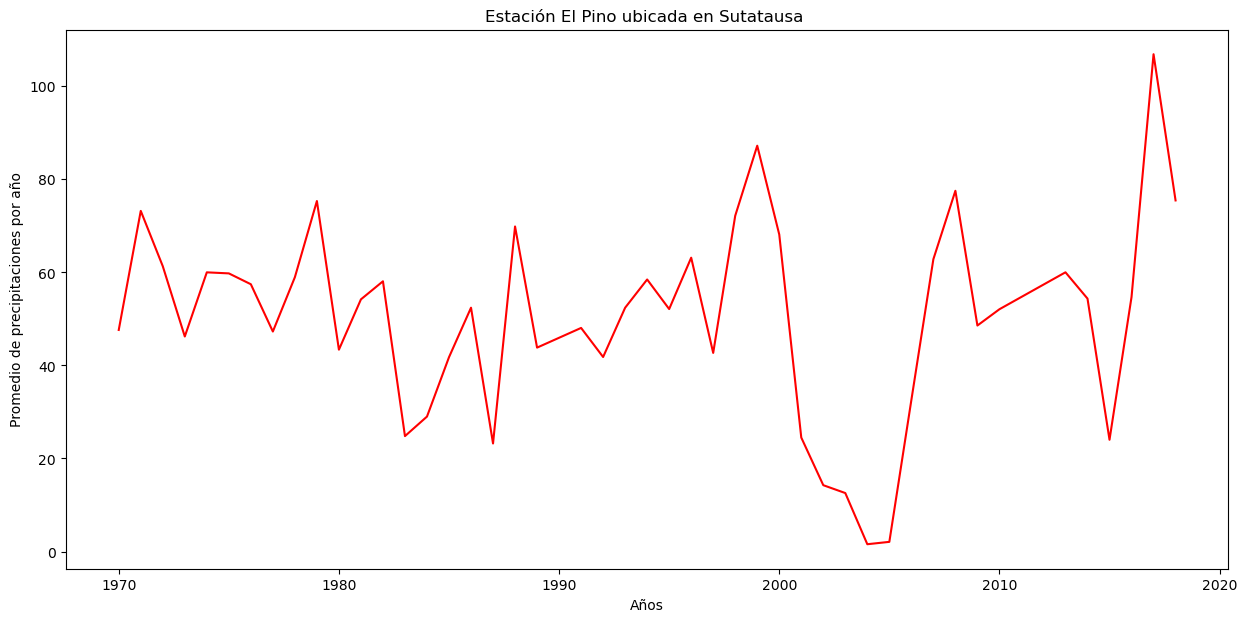

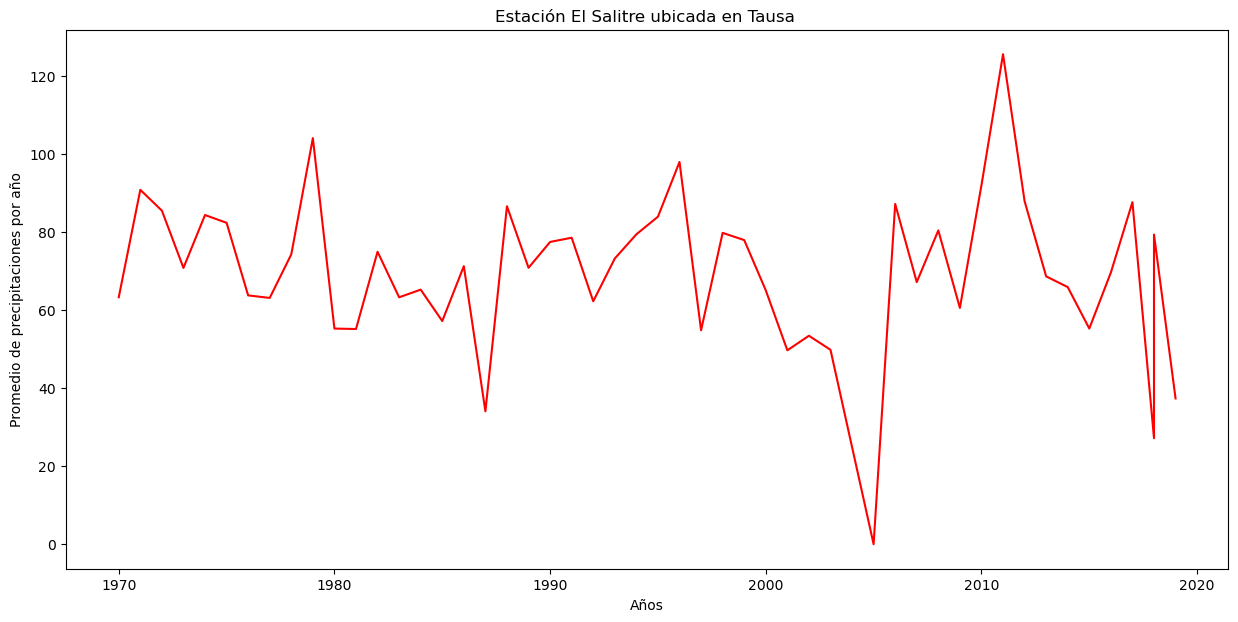

In [27]:
for i in range(len(estaciones)):
    plt.figure(figsize = (15,7))
    plt.plot(estaciones[i]["AÑO"].to_numpy().tolist(), promedios[i], color = "red")
    plt.title(f"Estación {est[i]} ubicada en {ubicaciones[i]} ")
    plt.xlabel("Años")
    plt.ylabel("Promedio de precipitaciones por año")
    plt.show()

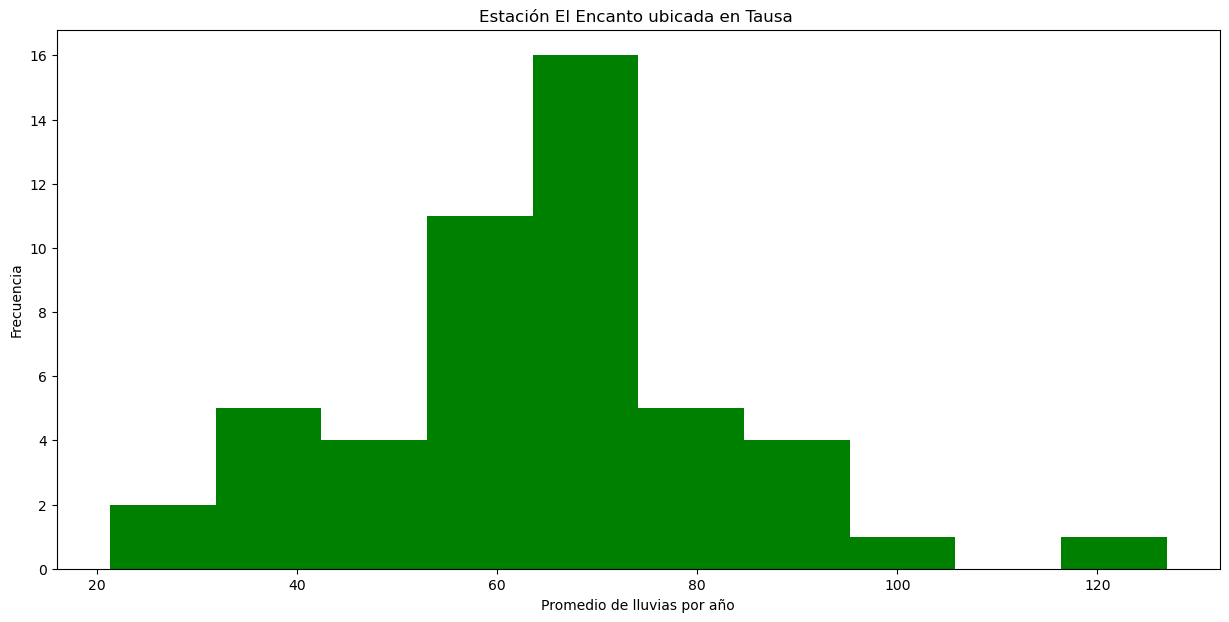

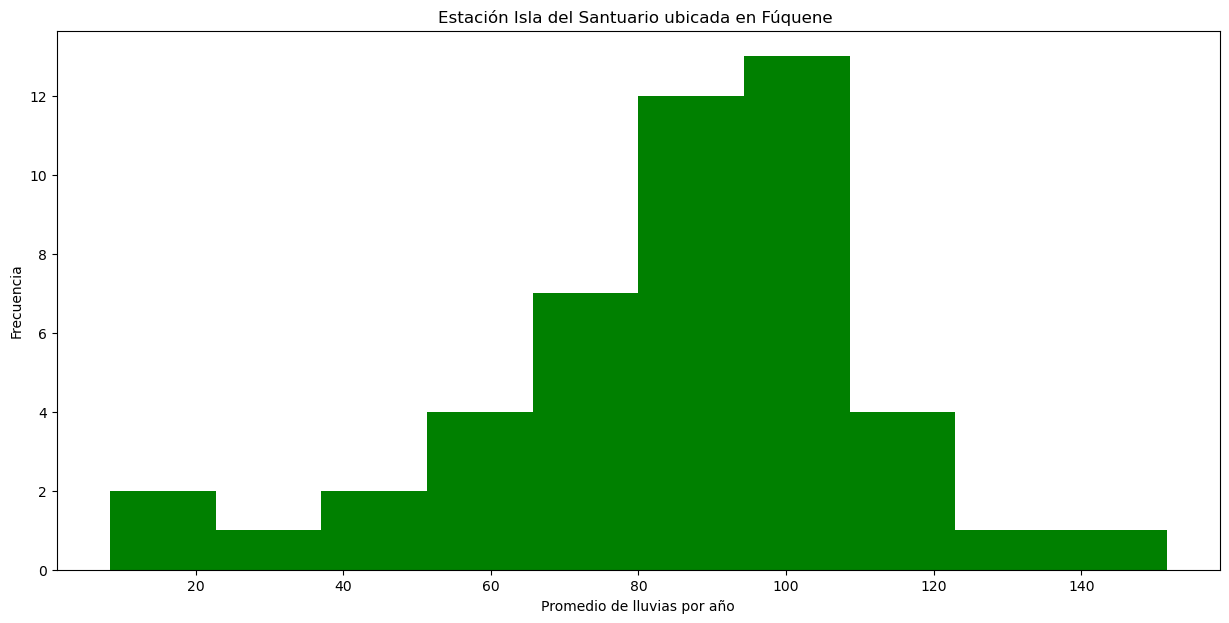

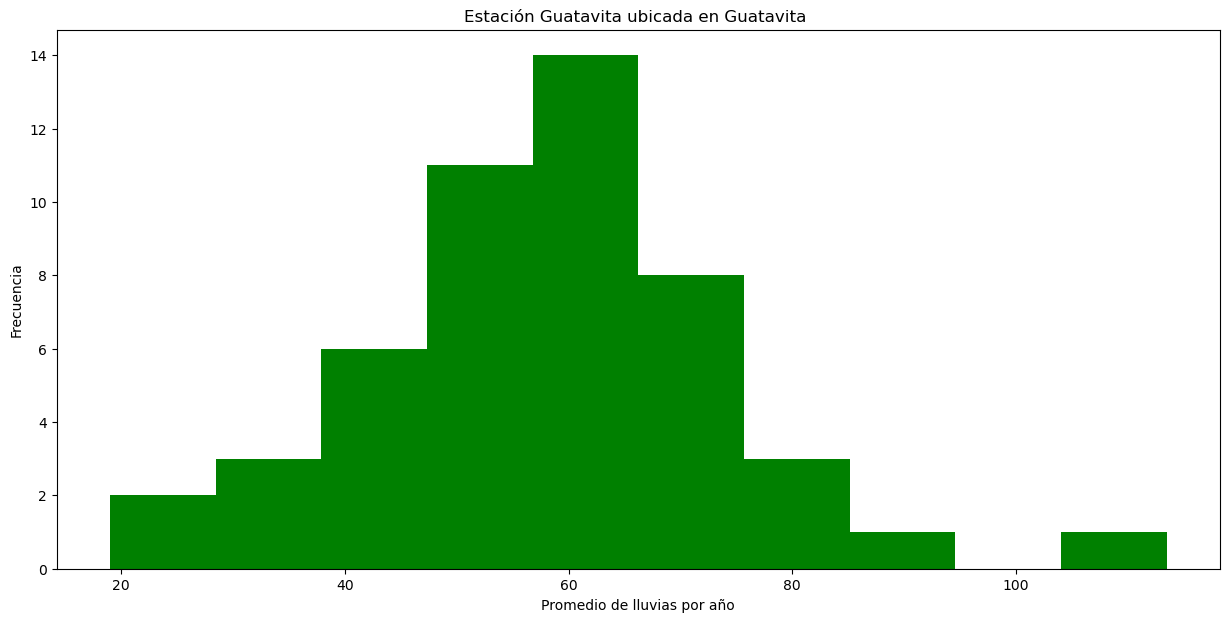

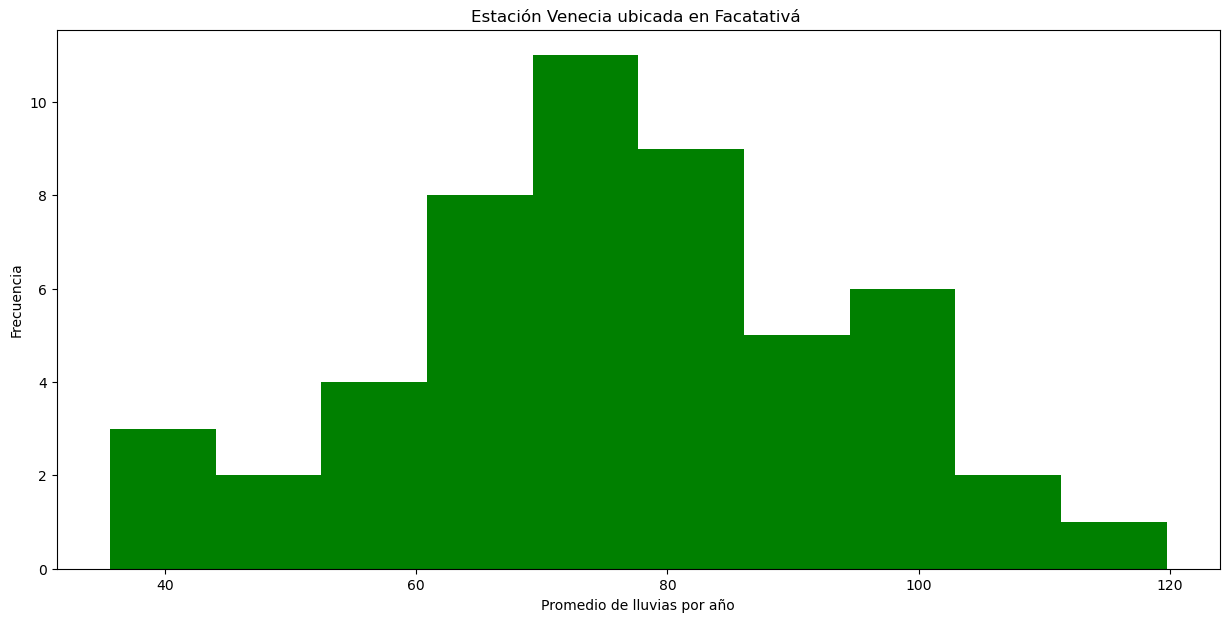

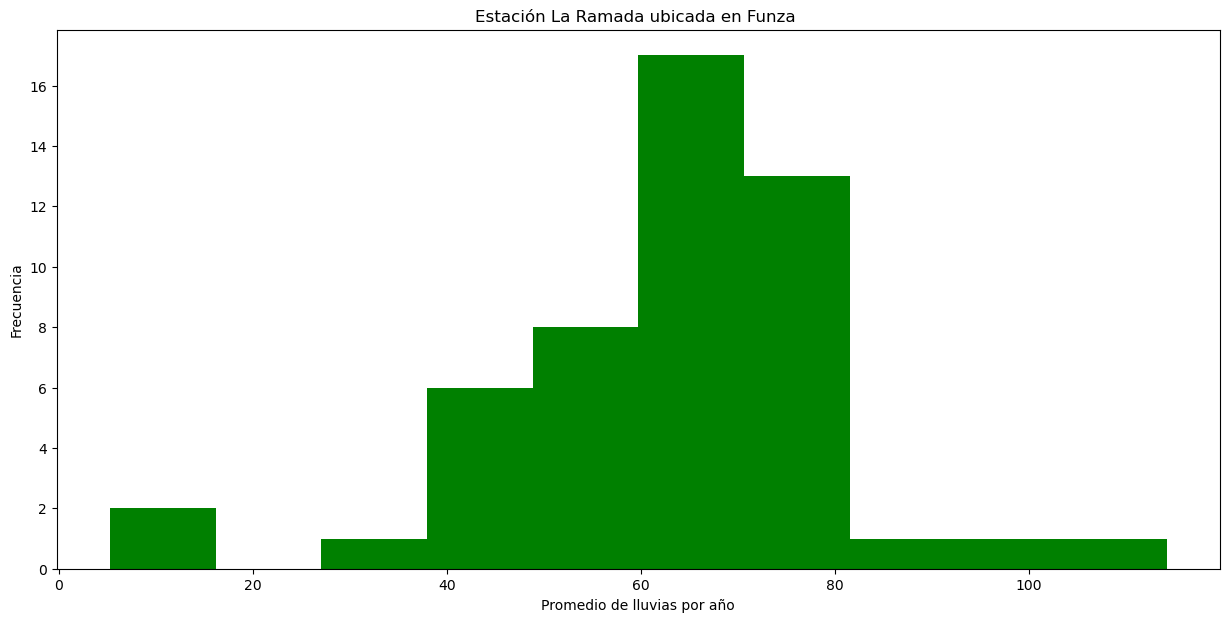

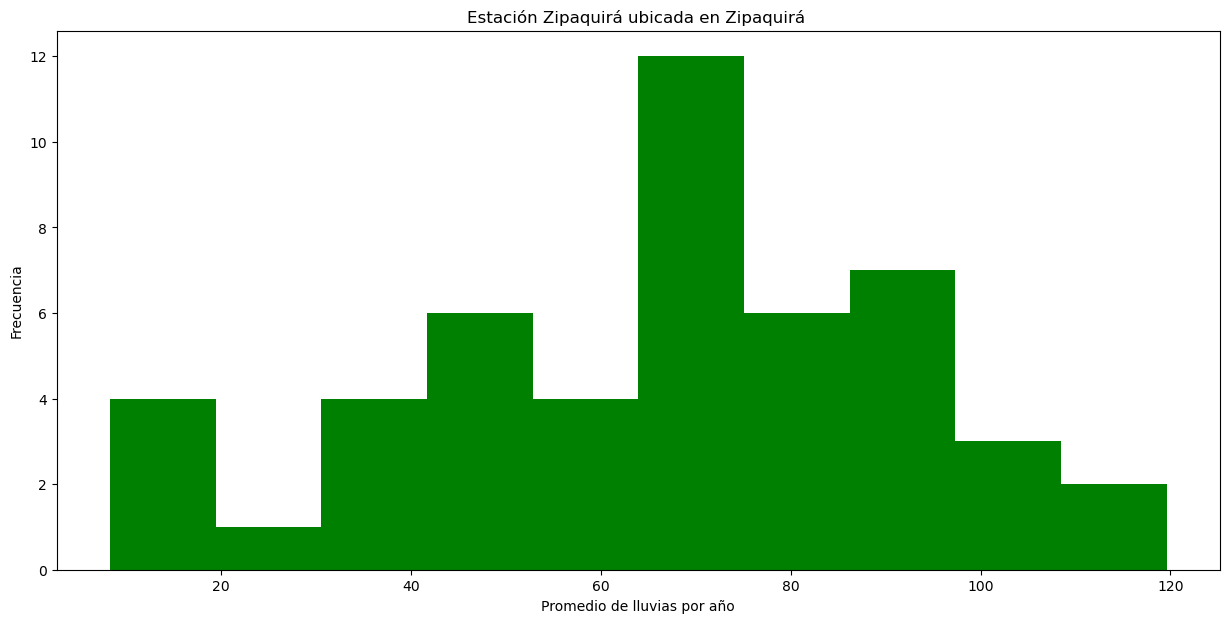

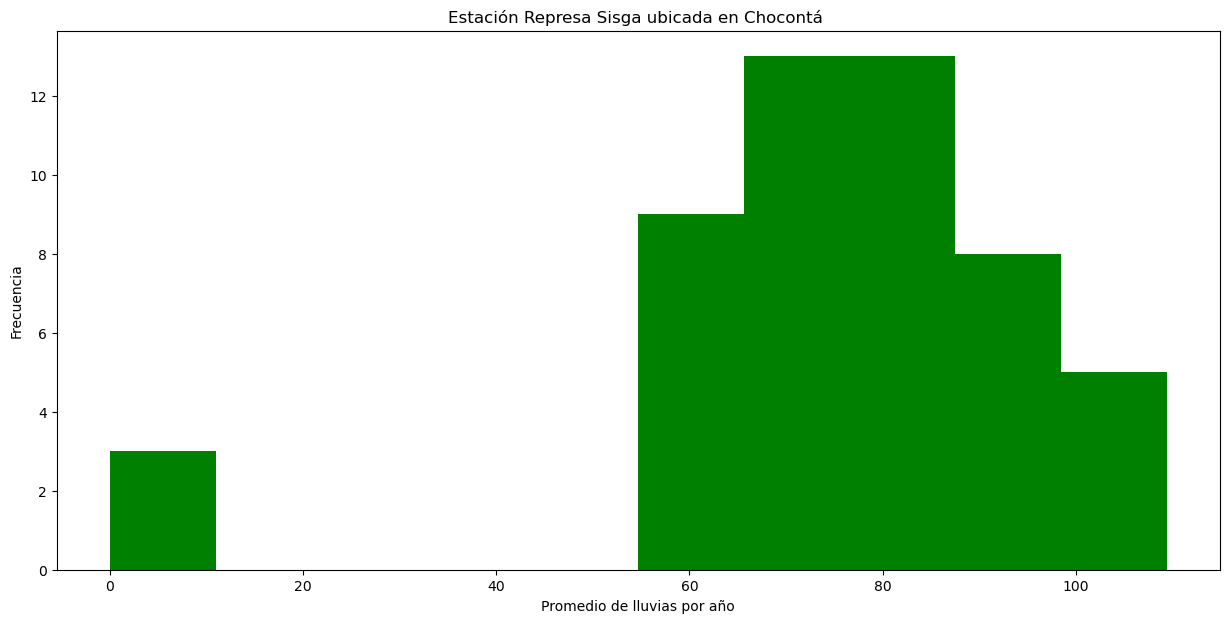

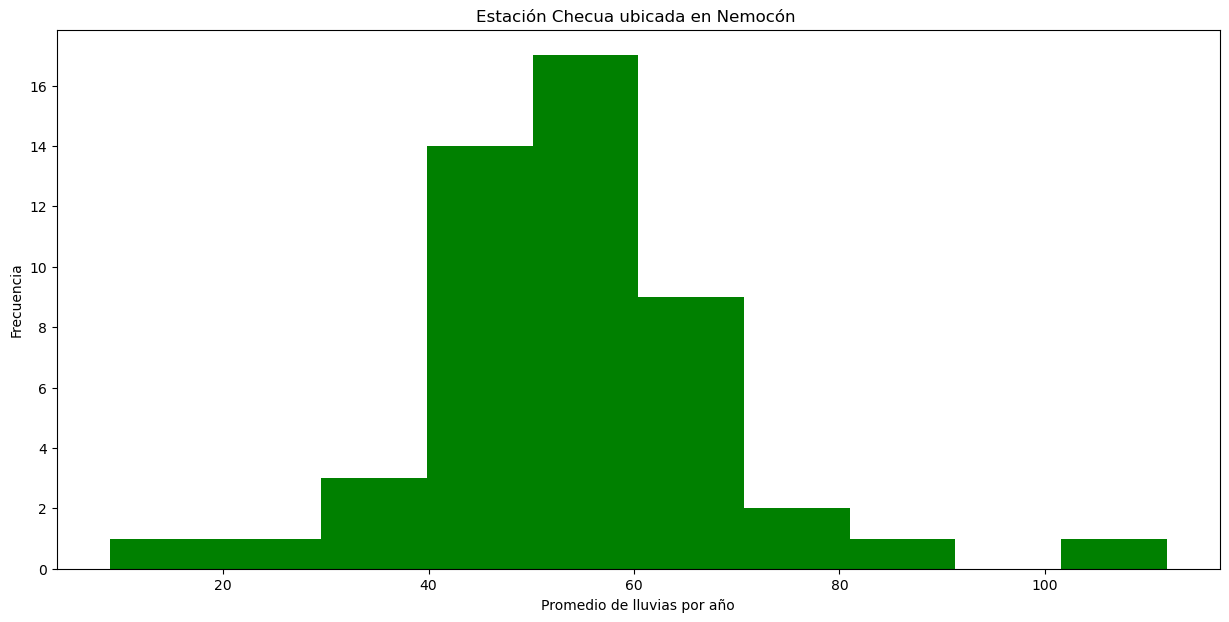

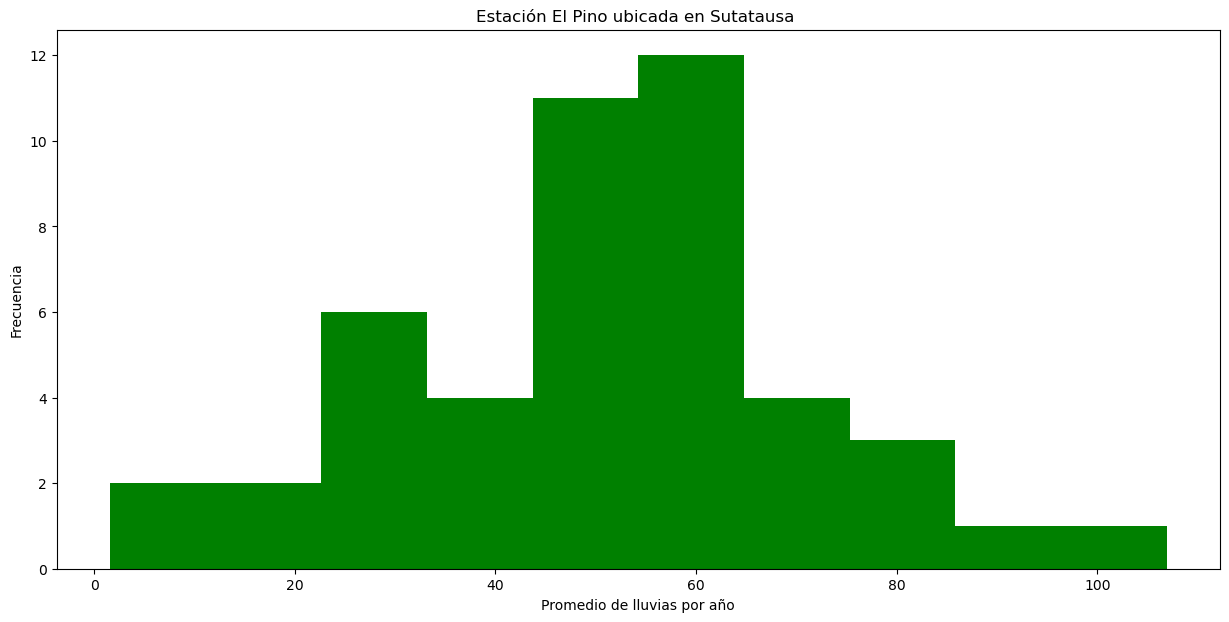

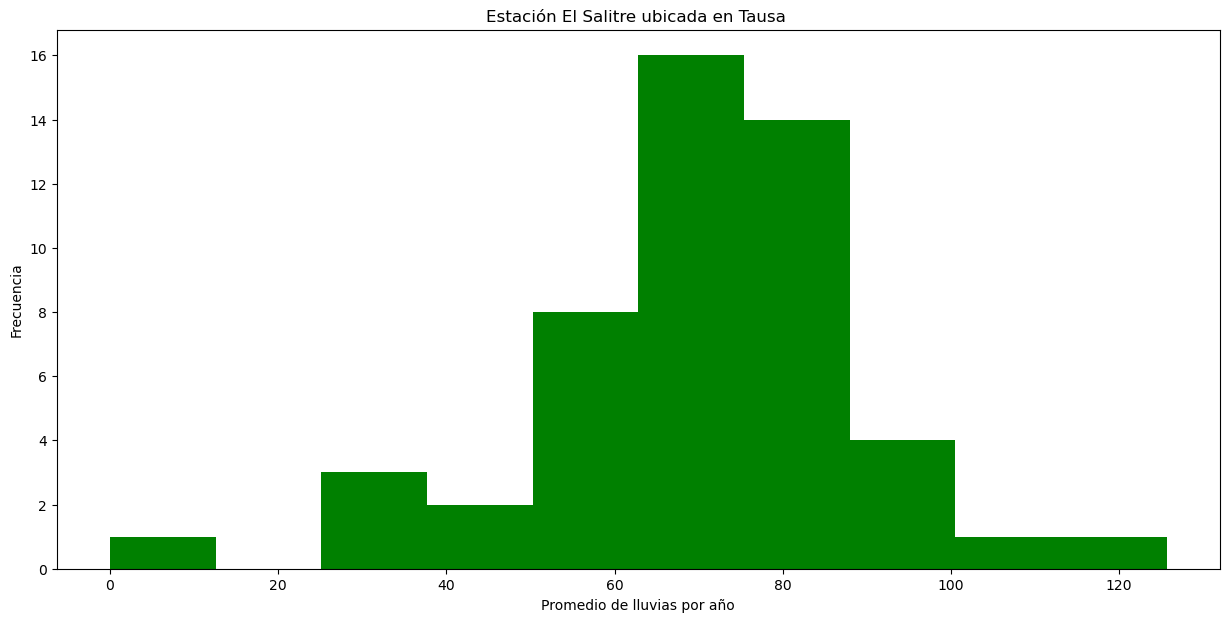

In [28]:
for i in range(len(estaciones)):
    plt.figure(figsize = (15,7))
    plt.hist(promedios[i], bins = 10, color = "green")
    plt.title(f"Estación {est[i]} ubicada en {ubicaciones[i]} ")
    plt.xlabel("Promedio de lluvias por año")
    plt.ylabel("Frecuencia")
    plt.show()

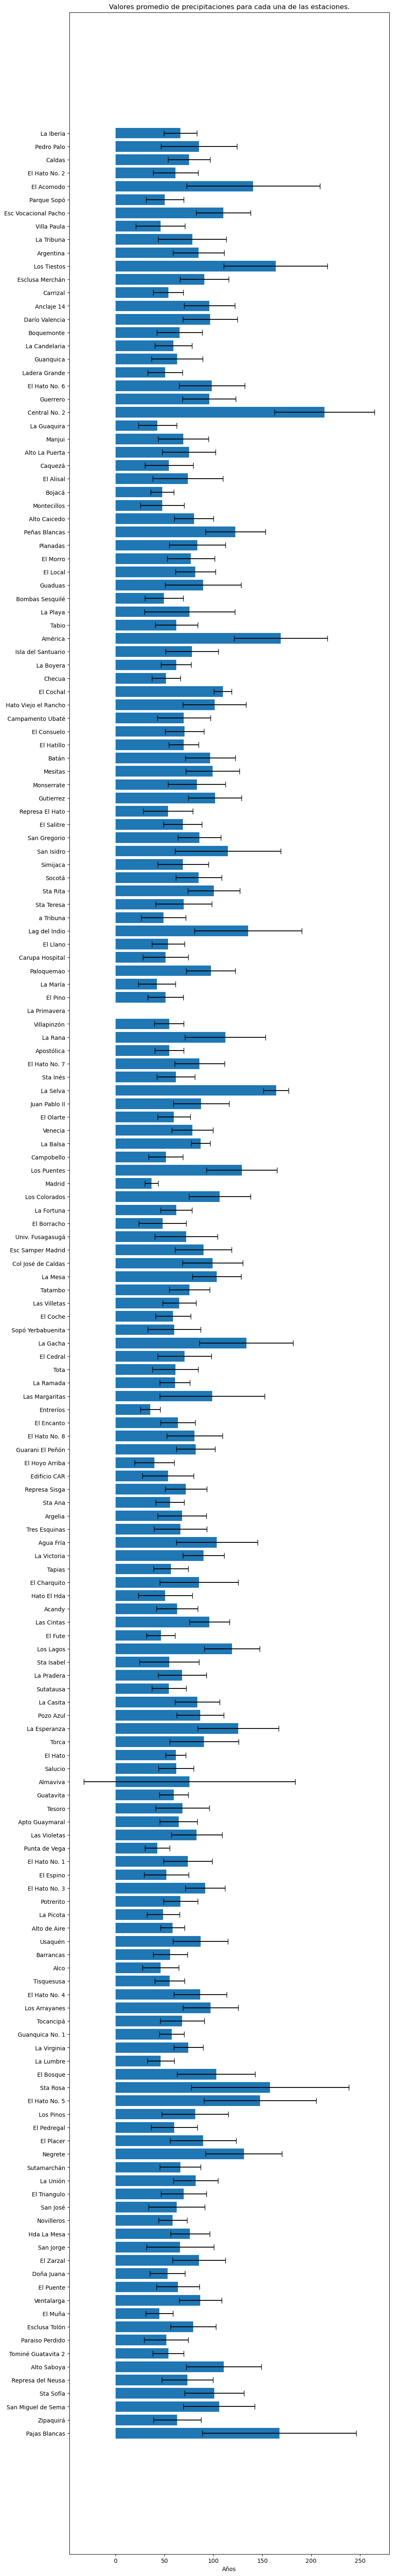

In [29]:
estaciones_totales = data["ESTACIÓN"].unique()
cundinamarca_completa = gpd.read_file("Cundinamarca/municipio25.shp", encoding = "utf-8")
df_total = pd.DataFrame()
data.index = data["ESTACIÓN"]
promedio_total = []
prom = []
desviacion = []
ubicaciones_totales = []
for i in estaciones_totales:
    estaciones_unicas = data.loc[i]
    promedio_total.append([])
    for j in range(len(estaciones_unicas)):
        promedio_total[len(promedio_total) - 1].append(sum(estaciones_unicas.iloc[[j]].to_numpy().tolist()[0][7:])/12)
    ubicaciones_totales.append(estaciones_unicas.iloc[[0]].to_numpy().tolist()[0][4])
for i in promedio_total:
    prom.append(sum(i)/len(i))
    desviacion.append(np.std(i))
df_total["ESTACIÓN"] = estaciones_totales
df_total["PROMEDIO_LLUVIA/AÑO"] = prom
df_total["DESVIACIÓN ESTANDAR"] = desviacion
df_total["MUNICIPIO"] = ubicaciones_totales

plt.figure(figsize = (10, 80))
plt.barh(df_total["ESTACIÓN"], df_total["PROMEDIO_LLUVIA/AÑO"], xerr = desviacion, capsize = 5)
plt.title("Valores promedio de precipitaciones para cada una de las estaciones.")
plt.xlabel("Años")
plt.show()

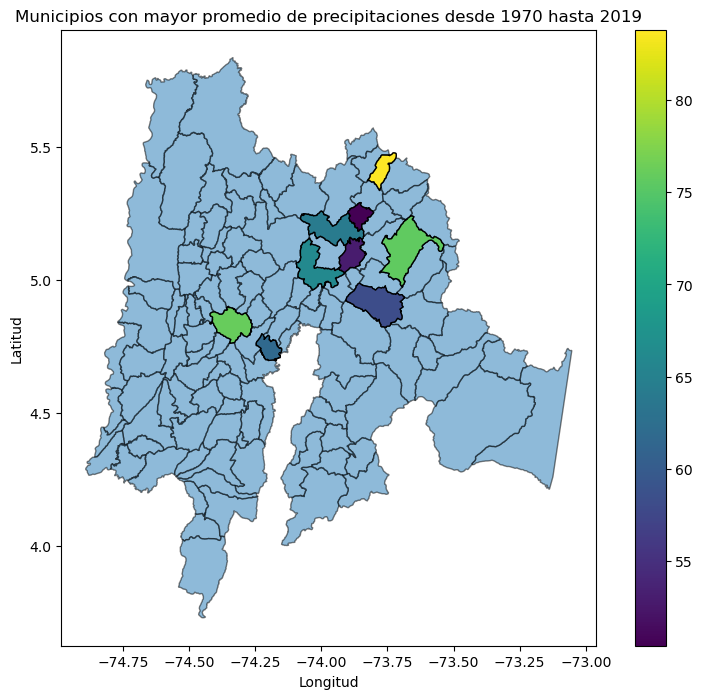

In [30]:
estaciones_hidrologicas = gpd.read_file("RedHidrologica/Red_Hidrometeorol%C3%B3gica_CAR.shp")
cundinamarca = gpd.read_file("Cundinamarca/municipio25.shp", encoding = "utf-8")
croquis_cun = gpd.read_file("Cundinamarca/municipio25.shp", encoding = "utf-8")
estaciones_activas = ["REPRESA SISGA", "RAMADA LA", "EL PINO", "ZIPAQUIRA", "TESORO", "GUATAVITA - LOS MONOLITOS", "ENCANTO EL", "ISLA DEL SANTUARIO", "CHECUA", "VENECIA"]
municipios = ['Chocontá', 'Funza', 'Sutatausa', 'Zipaquirá', 'Guatavita', 'Fúquene', 'Nemocón', 'Facatativá', 'Tausa']
estaciones_hidrologicas.drop(estaciones_hidrologicas[~(estaciones_hidrologicas["NOMBRE"].isin(estaciones_activas))].index, inplace=True)
estaciones_hidrologicas.drop_duplicates(subset=["NOMBRE"], inplace = True)
cundinamarca.drop(cundinamarca[~(cundinamarca["munnombre"].isin(municipios))].index, inplace=True)
cundinamarca["PROMEDIO_LLUVIAS/AÑO [mm]"] = prom_año[:9]
mapas_superpuestos = croquis_cun.set_index("objectid").join(cundinamarca.set_index("objectid"), rsuffix = "_1")
mapas_superpuestos.set_geometry("geometry_1")
fig, fila = plt.subplots(1, figsize=(10, 8))
mapas_superpuestos.plot(alpha = 0.5, ax=fila, edgecolor = "black")          
cundinamarca.plot(ax=fila, column = "PROMEDIO_LLUVIAS/AÑO [mm]", cmap = "viridis", legend = True, edgecolor = "black") 
plt.title("Municipios con mayor promedio de precipitaciones desde 1970 hasta 2019")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()